In [76]:
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
HR = pd.read_csv("Height and ROM.csv")
HR.head()

,Time,ROM M,ROM SD,Height M,Height SD
0,Preop,28.2,25.7,7.9,1.4
1,48 months,26.4,9.9,9.1,1.1
2,96 months,20.2,11.8,11.3,2.7


In [77]:
HR[' ROM M'].describe()

count     3.000000
mean     24.933333
std       4.196824
min      20.200000
25%      23.300000
50%      26.400000
75%      27.300000
max      28.200000
Name:  ROM M, dtype: float64

In [78]:
HR['ROM SD'].describe()

count     3.000000
mean     15.800000
std       8.626123
min       9.900000
25%      10.850000
50%      11.800000
75%      18.750000
max      25.700000
Name: ROM SD, dtype: float64

In [79]:
HR['Height M'].describe()

count     3.000000
mean      9.433333
std       1.724336
min       7.900000
25%       8.500000
50%       9.100000
75%      10.200000
max      11.300000
Name: Height M, dtype: float64

In [80]:
HR['Height SD'].describe()

count    3.000000
mean     1.733333
std      0.850490
min      1.100000
25%      1.250000
50%      1.400000
75%      2.050000
max      2.700000
Name: Height SD, dtype: float64

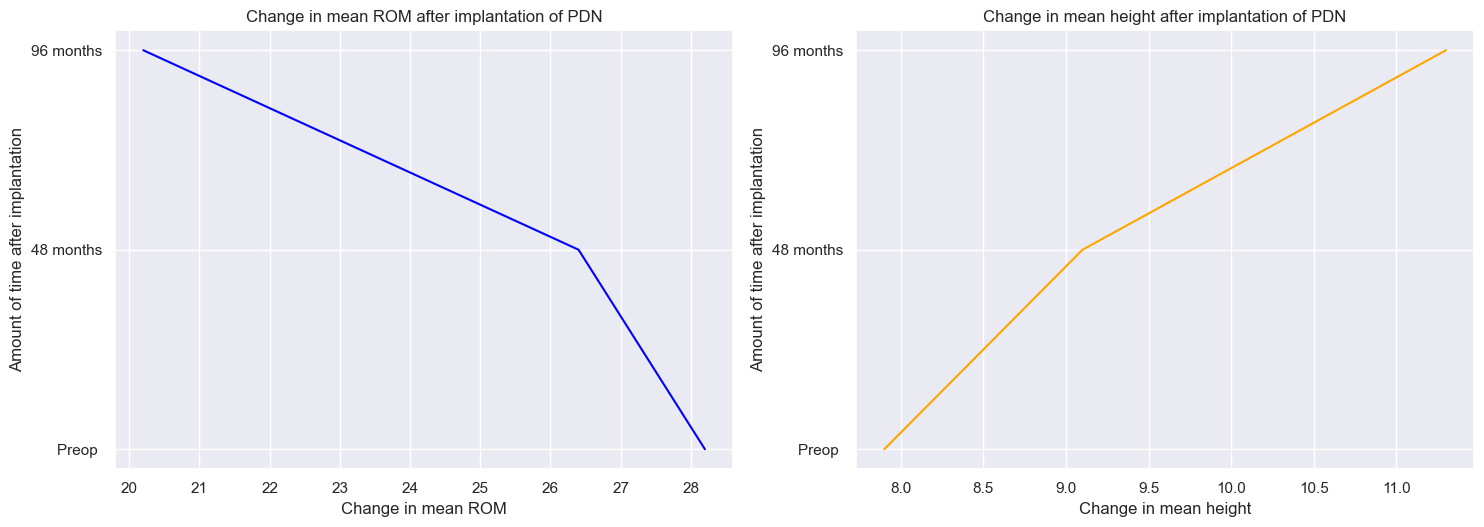

In [103]:
# creation of a data frame for the data set, calling columns for each variable for ease of access 

df = pd.DataFrame(HR)
T = list(df.iloc[:,0])
RM = list(df.iloc[:,1])
RS = list(df.iloc[:,2])
HM = list(df.iloc[:,3])
HS = list(df.iloc[:,4])


# Plotting line graphs
plt.figure(figsize=(15, 10))

# Line graph for the change in mean ROM
plt.subplot(2, 2, 1)
plt.plot(RM, T, color='blue', label='Mean ROM change')
plt.title('Change in mean ROM after implantation of PDN')
plt.xlabel('Change in mean ROM')
plt.ylabel('Amount of time after implantation')

# Line graph for change in mean height 
plt.subplot(2, 2, 2)
plt.plot(HM, T, color='orange', label='Mean height change')
plt.title('Change in mean height after implantation of PDN')
plt.xlabel('Change in mean height')
plt.ylabel('Amount of time after implantation')


plt.tight_layout()
plt.show()




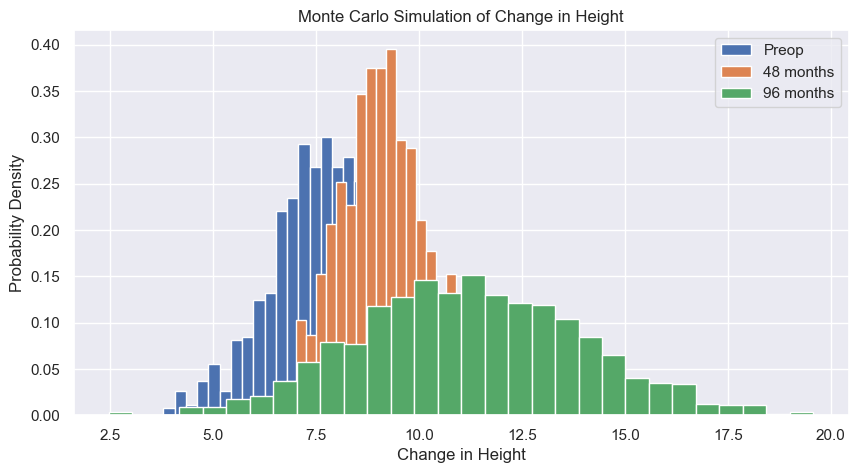

In [82]:
# creating an array for the mean and standard dev of the mean height, having to create array to show the change in height over multiple months after implantation of the PDN 
mean_change_height = np.array([7.9, 9.1, 11.3])
std_dev_height = np.array([1.4, 1.1, 2.7])

num_simulations = 1000  

# Generate random samples for change in height using normal distribution for each mean
change_height_simulations = np.concatenate([np.random.normal(mean, std_dev, num_simulations) for mean, std_dev in zip(mean_change_height, std_dev_height)])

# Plotting separate histograms for preop, and then 48 and 96 months after implantation of PDN 
plt.figure(figsize=(10, 5))

for label, (mean, std_dev) in zip(["Preop", "48 months", "96 months"], zip(mean_change_height, std_dev_height)):
    plt.hist(np.random.normal(mean, std_dev, num_simulations), bins=30, density=True, label=label)

# creating graph for the monte carlo sim for change in mean height 
plt.title('Monte Carlo Simulation of Change in Height')
plt.xlabel('Change in Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()




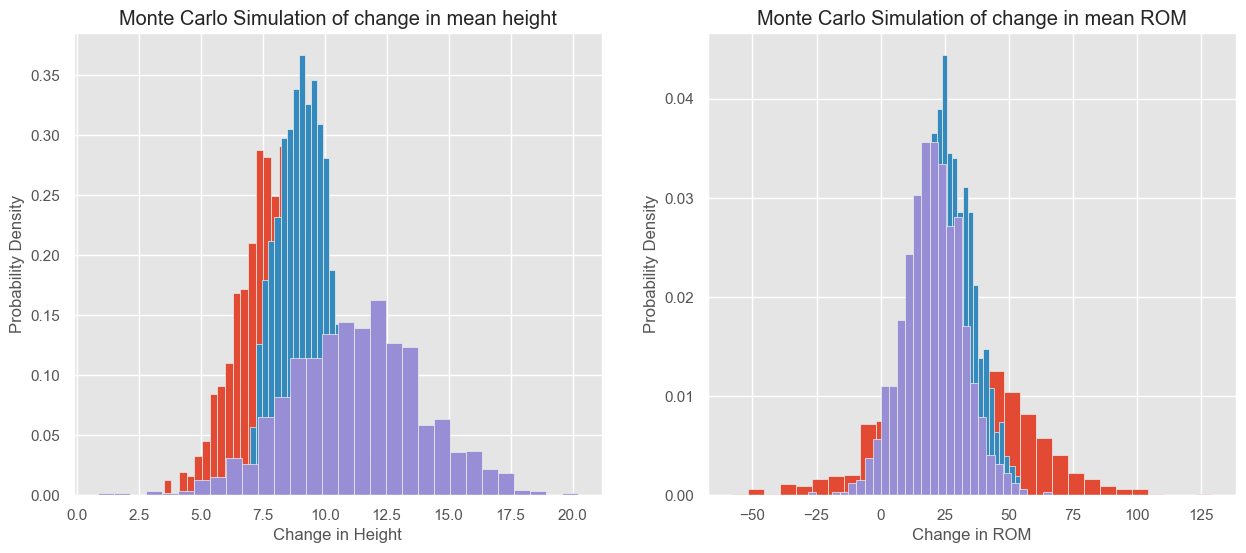

In [130]:
# to use multiple means and standard deviations an array must be created, arrays created for both variables
mean_height = np.array([7.9, 9.1, 11.3])
std_height = np.array([1.4, 1.1, 2.7])

mean_ROM = np.array([28.2, 26.4, 20.2])
std_ROM = np.array([25.7, 9.9, 11.8])

# number of simulations 
num_simulations = 1000

# np.concatenate joins together mutliple arrays and combines them, in this case for the variables that have been zipped together
Height_sims = np.concatenate([np.random.normal(mean, std_dev, num_simulations) for mean, std_dev in zip(mean_height, std_height)])
ROM_sims = np.concatenate([np.random.normal(mean, std_dev, num_simulations) for mean, std_dev in zip(mean_ROM ,std_ROM)])

# Plotting separate histograms for each variable and preop, 48 and 96 months after implantation
plt.figure(figsize=(15, 6))

# creating subplot for mean height sim
plt.subplot(1, 2, 1)
for label, (mean, std_dev) in zip(["Preop", "48 months", "96 months"], zip(mean_height, std_height)):
    plt.hist(np.random.normal(mean, std_dev, num_simulations), bins=30, density=True, label = label)
plt.title('Monte Carlo Simulation of change in mean height')
plt.xlabel('Change in Height')
plt.ylabel('Probability Density')


# creating subplot for mean ROM sim
plt.subplot(1, 2, 2)
for label, (mean, std_dev) in zip(["Preop", "48 months", "96 months"], zip(mean_ROM, std_ROM)):
    plt.hist(np.random.normal(mean, std_dev, num_simulations), bins=30, density=True, label = label )
plt.title('Monte Carlo Simulation of change in mean ROM')
plt.xlabel('Change in ROM')
plt.ylabel('Probability Density')

plt.show()


In [90]:
# creating arrays for mean height and ROM
x = np.array([7.9, 9.1, 11.3])
y = np.array([28.2, 26.4, 20.2])

# using numpy's np.corrcoef() function to return the correlation matrix, called cm 
cm = np.corrcoef(x, y)
pc = cm[0,1]

# prints the pearson correlation coef
print(f"Pearson correlation coefficient (numpy): {pearson_coefficient_np}")


Pearson correlation coefficient (numpy): -0.9903178983146026


The mean height and ROM change were shown to have a pearson correlation value of - 0.99, showing a negative correlation even if it is slight, meaning when one variable increases, the other decreases and vice versa

In [111]:
import scipy.stats 

# creating arrays for mean height and ROM
x = np.array([7.9, 9.1, 11.3])
y = np.array([28.2, 26.4, 20.2])

# for linear regression, need two arrays which are same length 
result = scipy.stats.linregress(x, y)


# by unhashing one can find the slope, p value, standard error of estimated gradient and r value 
#result.slope
#result.pvalue
#result.stderr
result.rvalue



-0.9903178983146026

slope = -2.4103139013452908

p value = 0.08866066229116626

standard error = 0.33786641313563237

r value = -0.9903178983146026 , same as the pearson correlation coef, probably cause theyre the same thing 

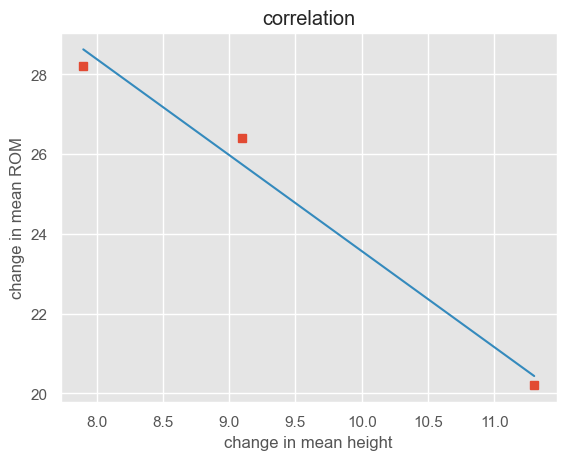

In [137]:
plt.style.use('ggplot')

# creating arrays for mean height and ROM
x = np.array([7.9, 9.1, 11.3])
y = np.array([28.2, 26.4, 20.2])
xy = np.array([[7.9, 9.1, 11.3],
              [28.2, 26.4, 20.2]])


# creation of an f string 
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# plotting the graph 
fig, ax = plt.subplots()
ax.plot(x, y, linewidth = 0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
plt.title('correlation')
plt.xlabel('change in mean height')
plt.ylabel('change in mean ROM')

plt.show()



creating a correlation graph allows an easier way to visualise the data, again showing the negative correlation as seen from the negative slope as seen from the graph above and from the calculating slope being -2.41. 

In [131]:
#correlation_matrix = np.corrcoef(x, y).round(decimals=2)
#
#fig, ax = plt.subplots()
#im = ax.imshow(correlation_matrix)
#im.set_clim(-1, 1)
#ax.grid(False)
#ax.xaxis.set(ticks=(0, 1), ticklabels=('x','y'))
#ax.yaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
#ax.set.ylim(2.5, -0.5)
#for i in range(3):
 #   for j in range(3):
  #      ax.text(j, i, correlation_matrix[i, j], ha = 'center', va = 'center',
   #             color='r')

#cbar = ax.figure.colorbar(im, ax=ax, format= '% .2f')
#plt.show()